# Maze Solver Notebook
 This notebook implements two informed search algorithms to solve mazes:
 - A* Search (optimal pathfinding)
 - Greedy Best-First Search (fast but not always optimal)
   The visualization shows the exploration process and final path.

## 1. Import Required Libraries

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import heapq
from typing import Tuple, List, Set, Optional
from IPython.display import display, clear_output
import time


## 2. Node Class Definition
Represents each position in the maze with:
- State: (row, col) coordinates
- Parent: Previous node
- Action: Movement taken to reach this node
- Cost: Path cost from start (g(n))
- Heuristic: Estimated cost to goal (h(n))

In [30]:
class Node:
    def __init__(self, state: Tuple[int, int], parent=None, action: Optional[str] = None, 
                 cost: int = 0, heuristic: int = 0):
        self.state = state
        self.parent = parent
        self.action = action
        self.cost = cost
        self.heuristic = heuristic

    def __lt__(self, other) -> bool:
        return (self.cost + self.heuristic) < (other.cost + other.heuristic)

## 3. Maze Class Definition
Handles maze parsing, solving, and visualization.

In [31]:
class Maze:
    def __init__(self, maze_str: str):
        self.maze = [list(line) for line in maze_str.split('\n') if line.strip()]
        self.maze = np.array(self.maze)
        self.height, self.width = self.maze.shape

        # Find start (A) and goal (B) positions
        self.start = None
        self.goal = None
        for i in range(self.height):
            for j in range(self.width):
                if self.maze[i, j] == 'A':
                    self.start = (i, j)
                elif self.maze[i, j] == 'B':
                    self.goal = (i, j)

        if self.start is None or self.goal is None:
            raise ValueError("Maze must include start ('A') and goal ('B') points.")

    def neighbors(self, state: Tuple[int, int]) -> List[Tuple[str, Tuple[int, int]]]:
        """Returns all valid neighboring states without prioritization"""
        i, j = state
        directions = [
            ("right", (i, j + 1)),
            ("down", (i + 1, j)),
            ("left", (i, j - 1)),
            ("up", (i - 1, j))
        ]
        return [
            (action, (ni, nj)) 
            for action, (ni, nj) in directions 
            if 0 <= ni < self.height and 
               0 <= nj < self.width and 
               self.maze[ni, nj] != '#'
        ]

    def heuristic(self, state: Tuple[int, int]) -> int:
        """Manhattan distance heuristic"""
        return abs(state[0] - self.goal[0]) + abs(state[1] - self.goal[1])

    def solve(self, algorithm: str = "a*", visualize: bool = False):
        """Solves the maze with visualization"""
        if algorithm.lower() not in ["a*", "greedy"]:
            raise ValueError("Algorithm must be either 'a*' or 'greedy'")

        start_node = Node(
            state=self.start,
            parent=None,
            action=None,
            cost=0,
            heuristic=self.heuristic(self.start)
        )
        
        frontier = []
        heapq.heappush(frontier, start_node)
        
        visited = {self.start: 0}
        all_visited = set([self.start])
        
        fig = None
        if visualize:
            plt.ion()
            fig = plt.figure(figsize=(10, 10))
            self._draw_maze()
            plt.scatter(self.start[1], self.start[0], c='green', s=500, label='Start (A)')
            plt.scatter(self.goal[1], self.goal[0], c='red', s=500, label='Goal (B)')
            plt.legend(fontsize=12)
            plt.show()

        while frontier:
            current_node = heapq.heappop(frontier)
            
            if current_node.state == self.goal:
                # Reconstruct path
                path = []
                actions = []
                node = current_node
                while node.parent is not None:
                    path.append(node.state)
                    actions.append(node.action)
                    node = node.parent
                path.append(self.start)
                path.reverse()
                actions.reverse()
                
                if visualize:
                    self._draw_path(path)
                    plt.pause(3)
                    plt.close()
                return (path, actions), all_visited

            for action, neighbor_state in self.neighbors(current_node.state):
                new_cost = current_node.cost + 1
                
                if neighbor_state not in visited or new_cost < visited[neighbor_state]:
                    visited[neighbor_state] = new_cost
                    all_visited.add(neighbor_state)
                    
                    if algorithm.lower() == "greedy":
                        priority = self.heuristic(neighbor_state)
                    else:  # A*
                        priority = new_cost + self.heuristic(neighbor_state)
                    
                    neighbor_node = Node(
                        state=neighbor_state,
                        parent=current_node,
                        action=action,
                        cost=new_cost,
                        heuristic=self.heuristic(neighbor_state)
                    )
                    
                    heapq.heappush(frontier, neighbor_node)
                    
                    if visualize:
                        self._draw_visited(all_visited)
                        plt.pause(0.05)
                        clear_output(wait=True)
                        display(fig)

        if visualize:
            plt.close()
        raise ValueError("No path exists from start to goal")

    def _draw_maze(self):
        """Draws the maze walls"""
        plt.imshow(np.where(self.maze == '#', 1, 0), cmap='binary')
        plt.xticks([])
        plt.yticks([])
        plt.grid(True, which='both', color='gray', linestyle='-', linewidth=0.5)
        plt.gca().set_xticks(np.arange(-0.5, self.width, 1), minor=True)
        plt.gca().set_yticks(np.arange(-0.5, self.height, 1), minor=True)

    def _draw_visited(self, visited: Set[Tuple[int, int]]):
        """Draws visited nodes"""
        for i, j in visited:
            if (i, j) != self.start and (i, j) != self.goal:
                plt.scatter(j, i, c='lightblue', s=300, alpha=0.6, marker='s')

    def _draw_path(self, path: List[Tuple[int, int]]):
        """Draws the solution path"""
        xs = [j for i, j in path]
        ys = [i for i, j in path]
        plt.plot(xs, ys, c='blue', linewidth=4, zorder=3)
        for i, j in path[1:-1]:  # Skip start and goal
            plt.scatter(j, i, c='blue', s=300, marker='s', zorder=3)

# 4. Define the maze


In [32]:
maze_str = """
##########
#A     # #
# ### #  #
# #   ## #
# # #    #
# ### ####
#     #B #
##########
""".strip()


# 5.  Initialize and solve

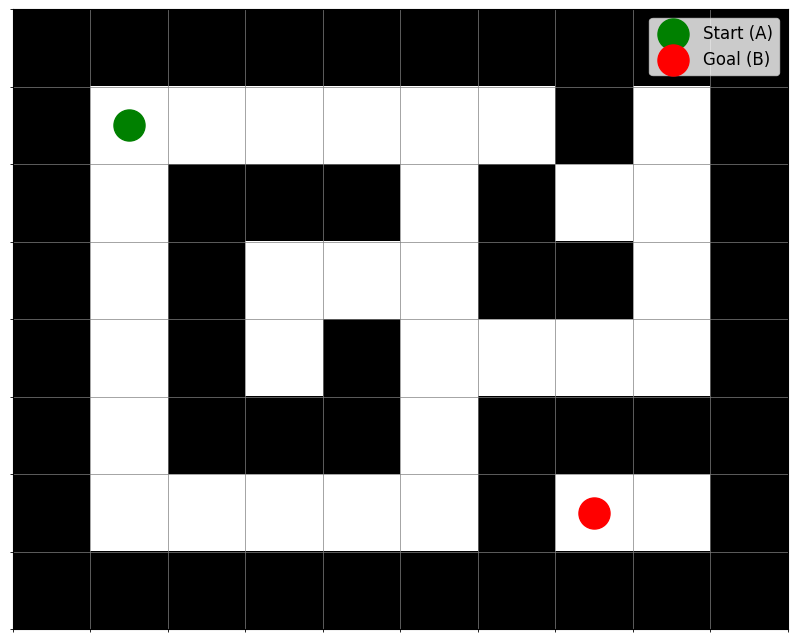

Error: No path exists from start to goal


In [33]:
maze = Maze(maze_str)

try:
    # Solve with A* and visualize
    print("Solving with A* algorithm:")
    (path, actions), visited = maze.solve(algorithm="a*", visualize=True)
    print(f"Path found with {len(path)-1} steps")
    print(f"Actions: {', '.join(actions)}")
    
    # Solve with Greedy and visualize
    print("\nSolving with Greedy algorithm:")
    (greedy_path, greedy_actions), greedy_visited = maze.solve(algorithm="greedy", visualize=True)
    print(f"Path found with {len(greedy_path)-1} steps")
    print(f"Actions: {', '.join(greedy_actions)}")
    
except ValueError as e:
    print(f"Error: {e}")

# 6. Compare both algorithms


In [34]:
if 'path' in locals() and 'greedy_path' in locals():
    print("\nComparison:")
    print(f"A* path length: {len(path)-1} steps")
    print(f"Greedy path length: {len(greedy_path)-1} steps")
    print(f"A* explored nodes: {len(visited)}")
    print(f"Greedy explored nodes: {len(greedy_visited)}")